In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('./train.csv', index_col=0)
train.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 58.9+ MB


In [6]:
train.describe()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [7]:
train.describe(include='O')

,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
count,593994,593994,593994,593994,593994,593994
unique,3,4,5,5,8,30
top,Female,Single,Bachelor's,Employed,Debt consolidation,C3
freq,306175,288843,279606,450645,324695,58695


In [8]:
train.isna().sum()

annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

## Vizualizations 

[]

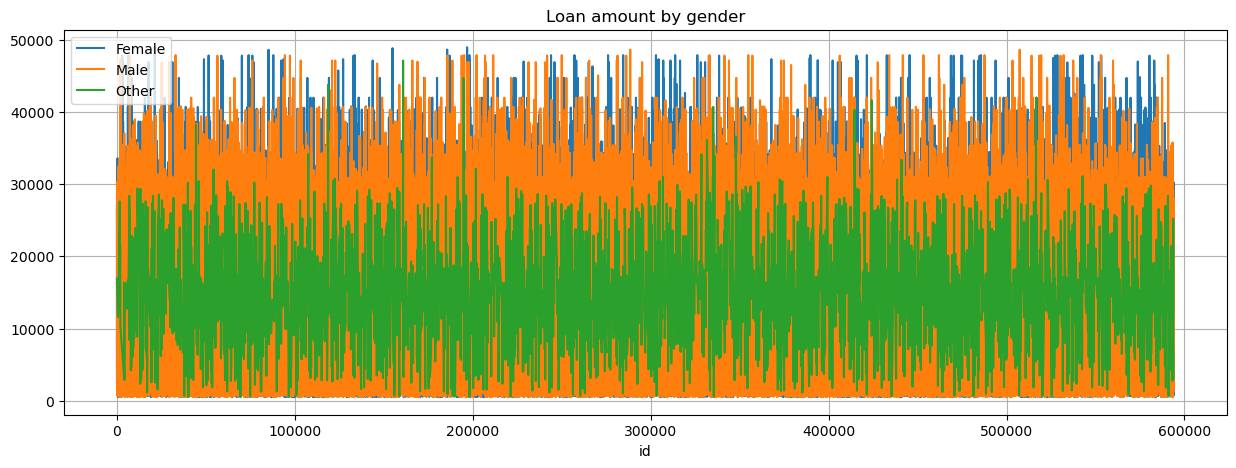

In [17]:
plt.figure(figsize=(15,5))
train.groupby(['gender'])['loan_amount'].plot()
plt.title('Loan amount by gender')
plt.legend()
plt.grid()
plt.plot()

/var/folders/q4/47bgnsdd20d4r1dgw9h6m26c0000gn/T/ipykernel_2116/2688393818.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/var/folders/q4/47bgnsdd20d4r1dgw9h6m26c0000gn/T/ipykernel_2116/2688393818.py:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('overwiev.png')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


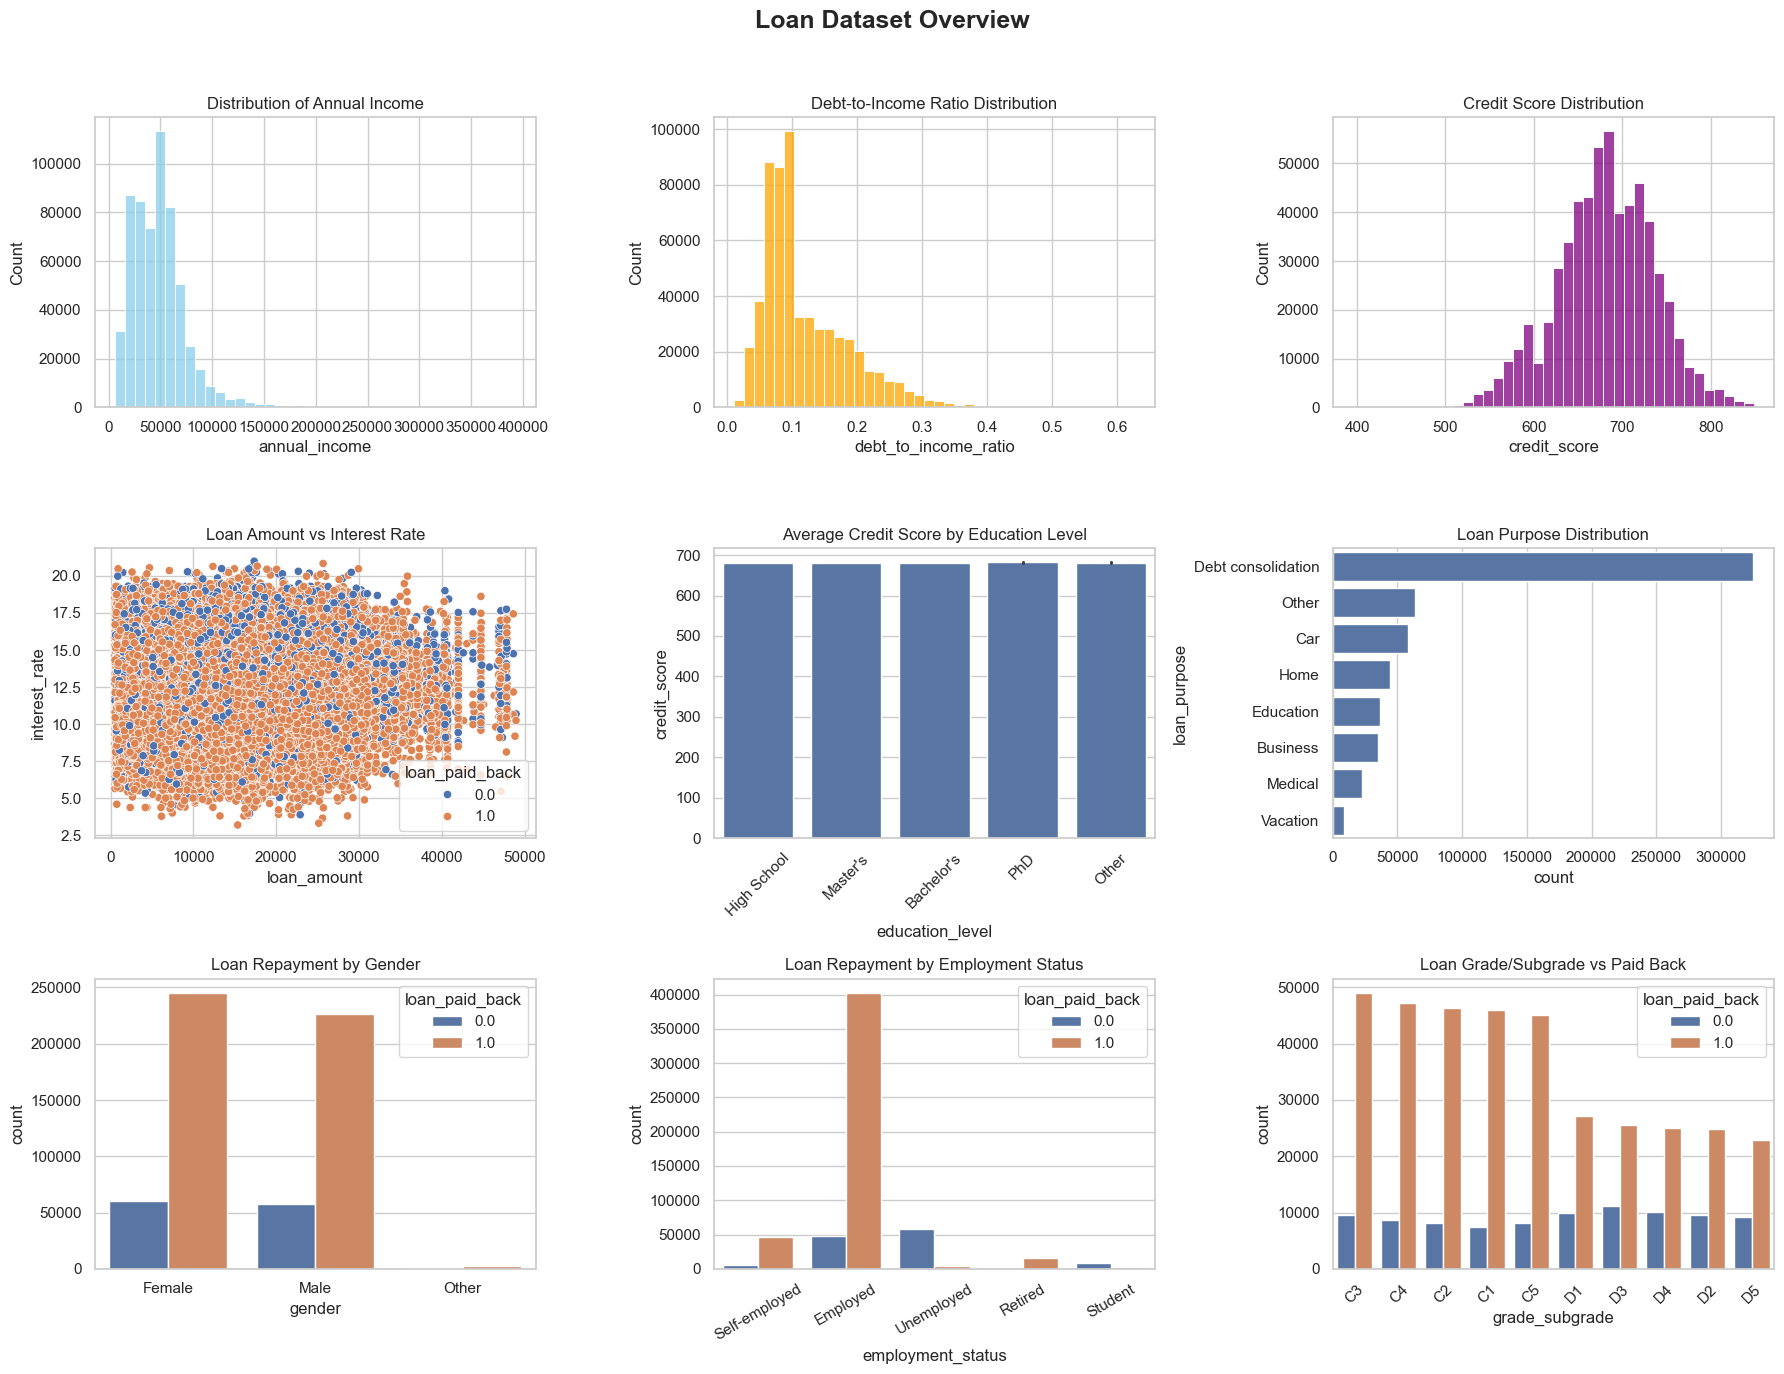

In [22]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle("Loan Dataset Overview", fontsize=18, fontweight='bold')

sns.histplot(train['annual_income'], bins=40, ax=axes[0,0], color='skyblue')
axes[0,0].set_title("Distribution of Annual Income")

sns.histplot(train['debt_to_income_ratio'], bins=40, ax=axes[0,1], color='orange')
axes[0,1].set_title("Debt-to-Income Ratio Distribution")

sns.histplot(train['credit_score'], bins=40, ax=axes[0,2], color='purple')
axes[0,2].set_title("Credit Score Distribution")

sns.scatterplot(data=train, x='loan_amount', y='interest_rate', hue='loan_paid_back', ax=axes[1,0])
axes[1,0].set_title("Loan Amount vs Interest Rate")

sns.barplot(data=train, x='education_level', y='credit_score', ax=axes[1,1])
axes[1,1].set_title("Average Credit Score by Education Level")
axes[1,1].tick_params(axis='x', rotation=45)

sns.countplot(data=train, y='loan_purpose', order=train['loan_purpose'].value_counts().index, ax=axes[1,2])
axes[1,2].set_title("Loan Purpose Distribution")

sns.countplot(data=train, x='gender', hue='loan_paid_back', ax=axes[2,0])
axes[2,0].set_title("Loan Repayment by Gender")

sns.countplot(data=train, x='employment_status', hue='loan_paid_back', ax=axes[2,1])
axes[2,1].set_title("Loan Repayment by Employment Status")
axes[2,1].tick_params(axis='x', rotation=30)

sns.countplot(data=train, x='grade_subgrade', hue='loan_paid_back', ax=axes[2,2],
              order=train['grade_subgrade'].value_counts().index[:10])
axes[2,2].set_title("Loan Grade/Subgrade vs Paid Back")
axes[2,2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('overwiev.png')
plt.show()

In [37]:
# train['gender'] = train['gender'].map({'Female':0, 'Male':1, 'Other':2})
# train['marital_status'] = train['marital_status'].map({'Single':0, 'Married':1, 'Divorced':2, 'Widowed':3,})
# train['education_level'] = train['education_level'].map({'Bachelor\'s':0, 'High School':1, 'Master\'s':2, 'Other':3,'PhD':4})
# train['employment_status'] = train['employment_status'].map({'Employed':0, 'Unemployed':1, 'Self-employed':2, 'Retired':3,'Student':4})
# train['loan_purpose'] = train['loan_purpose'].map({'Debt consolidation':0, 'Other':1, 'Car':2, 'Home':3,'Education':4, 'Business':5, 'Medical':6, 'Vacation':7})

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cat_columns = ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose']

for column in cat_columns:
    train[column] = encoder.fit_transform(train[column])

In [41]:
train['grade'] = train['grade_subgrade'].str[0] 
train['subgrade_num'] = train['grade_subgrade'].str[1:].astype(int) 

In [43]:
train.drop('grade_subgrade', axis=1, inplace=True)

In [ ]:
train['grade'] = train['grade'].map({'A':0, 'B':1, 'C':2, 'D':3,'E':4, 'F':5,})

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,loan_paid_back,grade,subgrade_num
id,,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,0,2,1,2,6,1.0,C,3
1,22108.02,0.166,636,4593.10,12.92,1,1,2,0,2,0.0,D,3
2,49566.20,0.097,694,17005.15,9.76,1,2,1,0,2,1.0,C,5
3,46858.25,0.065,533,4682.48,16.10,0,2,1,0,2,1.0,F,1
4,25496.70,0.053,665,12184.43,10.21,1,1,1,0,6,1.0,D,1


In [50]:
train.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,loan_paid_back,grade,subgrade_num
id,,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,0,2,1,2,6,1.0,2,3
1,22108.02,0.166,636,4593.10,12.92,1,1,2,0,2,0.0,3,3
2,49566.20,0.097,694,17005.15,9.76,1,2,1,0,2,1.0,2,5
3,46858.25,0.065,533,4682.48,16.10,0,2,1,0,2,1.0,5,1
4,25496.70,0.053,665,12184.43,10.21,1,1,1,0,6,1.0,3,1


### Correlation

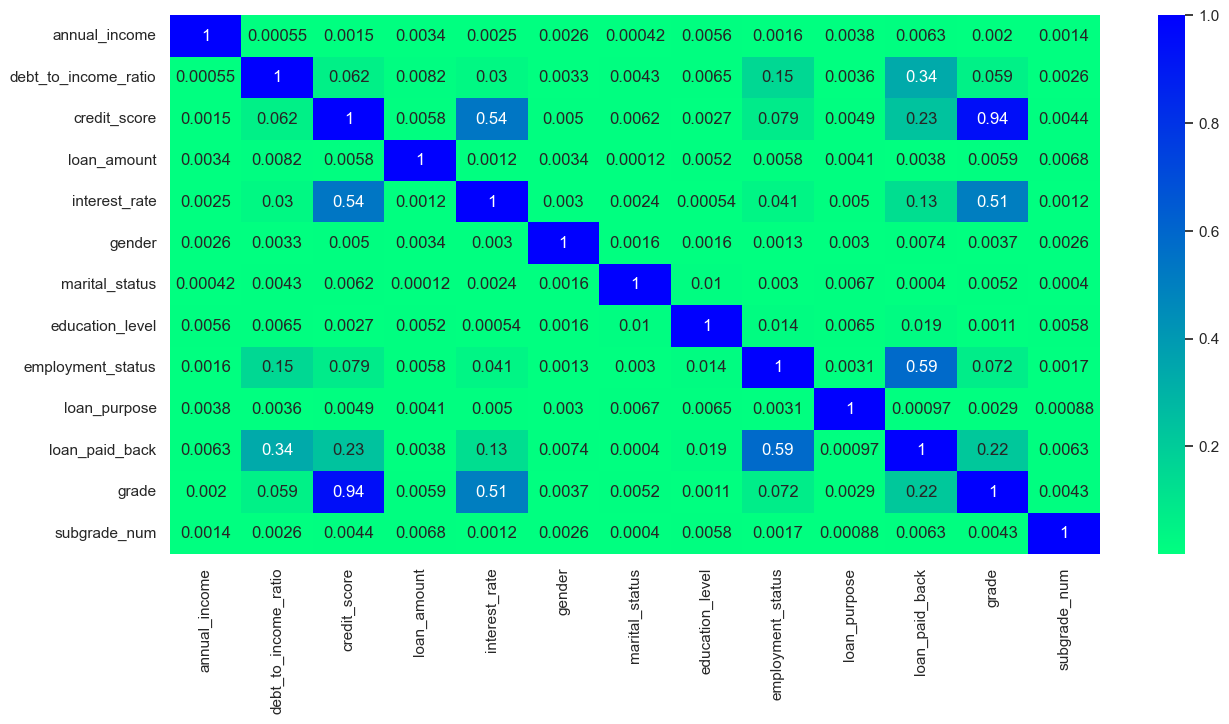

In [68]:
corr_data = train.corr().abs()

plt.figure(figsize=(15,7))
sns.heatmap(corr_data, annot=True, cmap='winter_r',cbar=True)
plt.show()

In [61]:
train.corrwith(train['loan_paid_back']).abs().sort_values(ascending=False)

loan_paid_back          1.000000
employment_status       0.585304
debt_to_income_ratio    0.335680
credit_score            0.234560
grade                   0.218781
interest_rate           0.131184
education_level         0.018781
gender                  0.007356
annual_income           0.006326
subgrade_num            0.006278
loan_amount             0.003762
loan_purpose            0.000973
marital_status          0.000404
dtype: float64